<a href="https://www.kaggle.com/wordsforthewise/lending-club">
    <img src="DATA/Lending_club_img.png" width=600>
</a>

# Lending Club loan data analysis using Keras API

## The Data

*We will be using a subset of the LendingClub DataSet obtained from Kaggle.*

LendingClub was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), **we will build a model that can predict wether or not a borrower will pay back their loan.** This way in the future when there is a new potential customer, we can assess whether or not they are likely to pay back the loan. 

*The "loan_status" column contains our  target label.*

---

## Load the data and imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns in the dataframe
pd.set_option('display.max_columns', None)

%matplotlib inline

In [3]:
# import data into a dataframe called 'df'
df = pd.read_csv('DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
# review the shape of the dataframe
df.shape

(396030, 27)

In [5]:
# use the info() method on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# use the describe method on the dataframe
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Data Overview
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>address</td>
      <td>The address assigned by the borrower</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

#### Note: Create helper function that provides feature information from the table above. Use this for easy lookup throughout the notebook.

In [7]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [8]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [9]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [10]:
feat_info('mort_acc')

Number of mortgage accounts.


# Exploratory Data Analysis

----

#### Review the target column:

In [11]:
# look at the target feature values
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

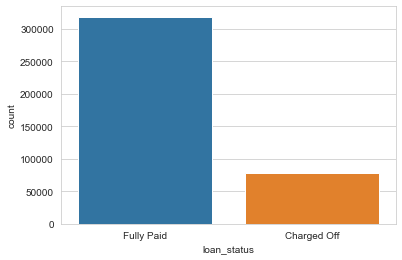

In [12]:
# review the target feature to identify how many borrowers were charged off vs. paid
sns.set_style('whitegrid')
sns.countplot(df['loan_status'])

In [13]:
# find the percentage of people who got 'Charged Off'
pd.DataFrame({'% borrowers':round(100 * df.loan_status.value_counts() / len(df), 1)})

,% borrowers
Fully Paid,80.4
Charged Off,19.6


Looks like the majority of people pay off their loans, but hopefully this model will be able to increase this percentage!

**Let's review the `loan_amnt` feature to see the distribution of loans requested.**

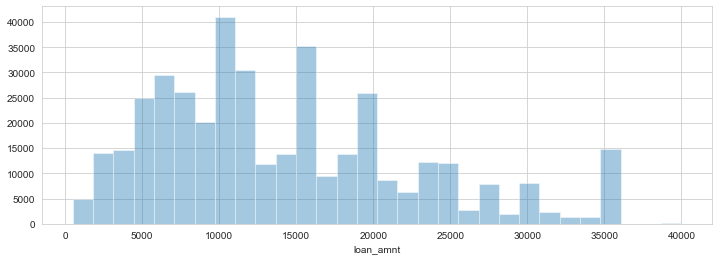

In [14]:
# create a histogram plot to show the loan_amnt feature
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=30)

In [15]:
# Lets review the range, mean, and std of the loan amounts
df.loan_amnt.describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

It looks like the majority of people are getting loans around $15,000, but since the histogram is skewed right, it seems like there are more than a few people getting larger loans.

#### Let's look at a correlation plot for the numerical features

In [16]:
# assign a variable to the correlation table for df
data_corr = df.corr()
data_corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


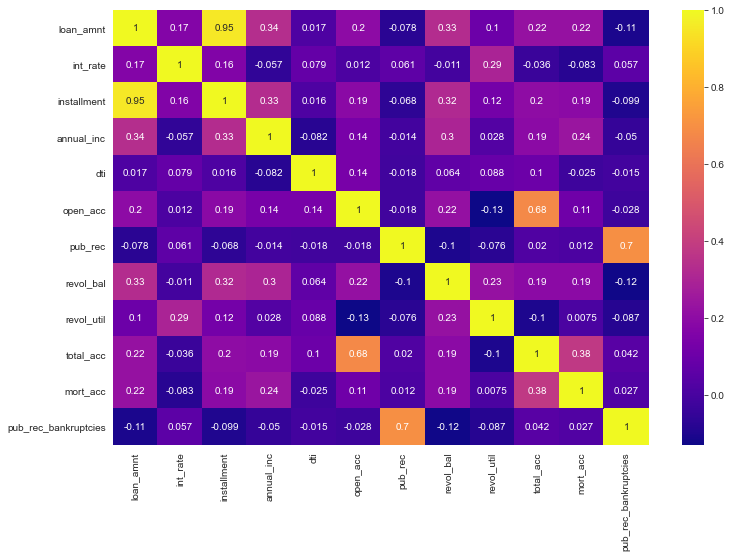

In [17]:
# plot the above correlation table as a heatmap for a visual reference
plt.figure(figsize=(12,8))
_ = sns.heatmap(data=data_corr, cmap='plasma', annot=True)

It looks like there is a very high correlation between the `installment` and `loan_amnt` features. Let's explore these a bit more.

*Review the feature descriptions with the `feat_into()` function.*

In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [19]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


Text(0.5, 1.0, 'installment vs loan_amnt')

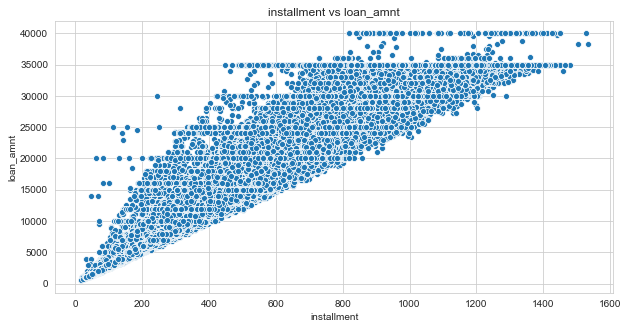

In [20]:
# create a simple scatter plot between the features
f = plt.figure(figsize=(10, 5))
_ = sns.scatterplot(x='installment', y='loan_amnt', data=df)
plt.title('installment vs loan_amnt')

#### Plot the relationship vs the target column `loan_status`, and the feature `loan_amnt` using a boxplot.

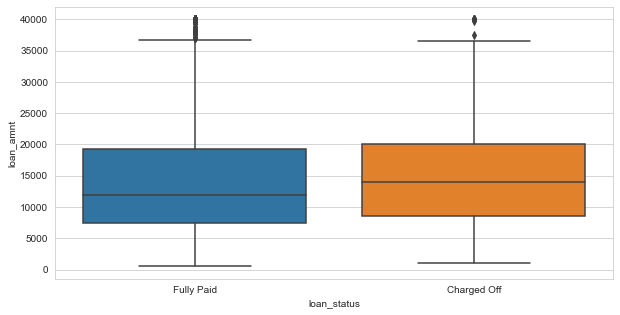

In [21]:
f = plt.figure(figsize=(10, 5))
_ = sns.boxplot(x='loan_status', y='loan_amnt', data=df)

Lets get some summary statistics for this graph above by grouping the features by `loan status`

In [22]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


It looks like, on average, the people that aren't paying off their loans are taking out larger loans than they can financially handle.

### Now lets look at some of the categorical features

In [23]:
# filter out columns by categorical features
for feat in df.columns:
    if df[feat].dtype == 'O':
        print(f'Categorical Feature: {feat}')

Categorical Feature: term
Categorical Feature: grade
Categorical Feature: sub_grade
Categorical Feature: emp_title
Categorical Feature: emp_length
Categorical Feature: home_ownership
Categorical Feature: verification_status
Categorical Feature: issue_d
Categorical Feature: loan_status
Categorical Feature: purpose
Categorical Feature: title
Categorical Feature: earliest_cr_line
Categorical Feature: initial_list_status
Categorical Feature: application_type
Categorical Feature: address


Let's start out by looking at the `grade` and `sub_grade` features.

In [24]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [25]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


Let's take a count of the values by plotting each feature

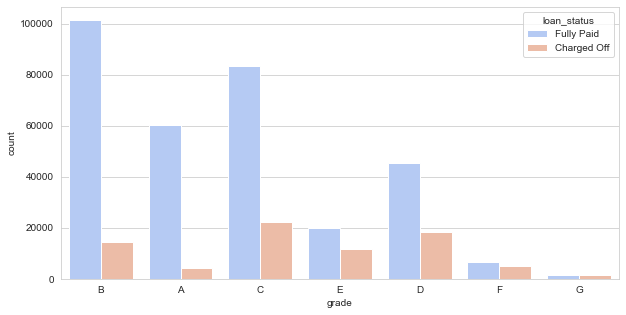

In [26]:
f = plt.figure(figsize=(10, 5))
_ = sns.countplot(x='grade', data=df, hue='loan_status', palette='coolwarm')

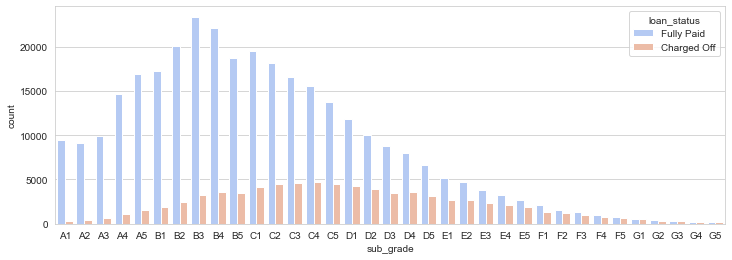

In [27]:
f = plt.figure(figsize=(12,4))
_ = sns.countplot(x='sub_grade', data=df.sort_values('sub_grade'), palette='coolwarm', hue='loan_status')

**It looks like E, F and G subgrades don't get paid back that often. We will isloate these and recreate the countplot just for those subgrades.**

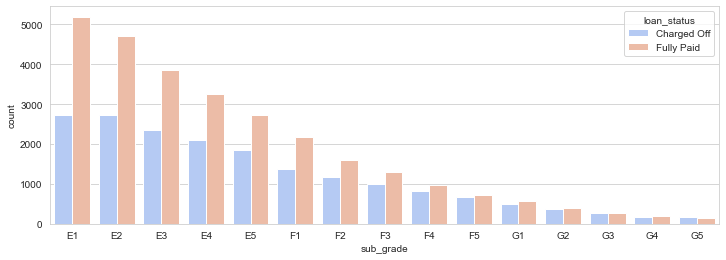

In [28]:
E = df[df['grade'] >= 'E']

f = plt.figure(figsize=(12,4))
_ = sns.countplot('sub_grade', data=E.sort_values('sub_grade'), hue='loan_status', palette='coolwarm')

Let's create a column that represents whether or not a loan was repaid as a binary value. It will be called `loan_repaid`.

In [29]:
def repay(paid_off):
    if paid_off == 'Fully Paid':
        return 1
    else:
        return 0
        
df['loan_repaid'] = df['loan_status'].apply(repay)

Since we created this column, we can now drop the `loan_status` column

In [88]:
df = df.drop('loan_status', axis=1)

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Let's create a barplot showing the correlation of all the numeric features in comparison to the `loan_repaid`

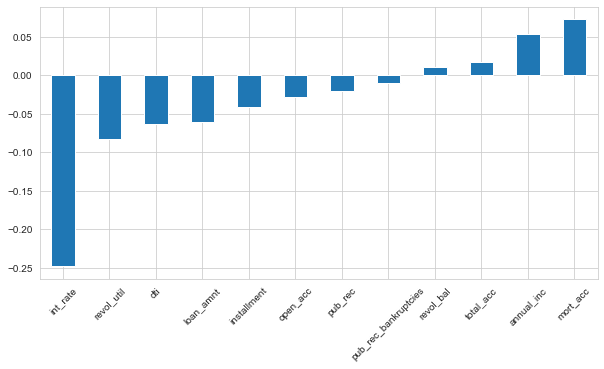

In [31]:
f = plt.figure(figsize=(10, 5))
_ = df.corr()['loan_repaid'].sort_values()[:-1].plot.bar()
_ = plt.xticks(rotation=45)

---
---
# Data PreProcessing

We will work with all the missing data

In [32]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

Review the shape of the data

In [33]:
df.shape

(396030, 28)

Look at each feature and their percent of missing values

In [34]:
pd.DataFrame({'% missing vals':round(100 * df.isnull().sum() / len(df), 2)})

,% missing vals
loan_amnt,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,5.79
emp_length,4.62
home_ownership,0.00
annual_inc,0.00


**Looking at the table above, let's examine `emp_title` and `emp_length` to see whether it will be okay to drop them.**

In [35]:
print(feat_info('emp_title'), '\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None 

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


Review the values in these features

In [36]:
df['emp_title'].nunique()

173105

In [37]:
df['emp_title'].value_counts()

Teacher                  4389
Manager                  4250
Registered Nurse         1856
RN                       1846
Supervisor               1830
                         ... 
USPS GRACIE STATION         1
GGNSC (Golden Living)       1
senior HVAC Tech            1
WCMH                        1
ISEC, Inc                   1
Name: emp_title, Length: 173105, dtype: int64

**There are just too many unique job titles to try to convert this to a dummy variable feature. Let's remove that `emp_title` column.**

In [38]:
df.drop('emp_title', axis=1, inplace=True)

Now let's look at `emp_length`

In [39]:
emplen = list(df['emp_length'].dropna().unique())
emplen

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year']

Let's sort these values and then plot them in a bar graph

In [40]:
emplen_sorted = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                '6 years', '7 years', '8 years', '9 years', '10+ years']

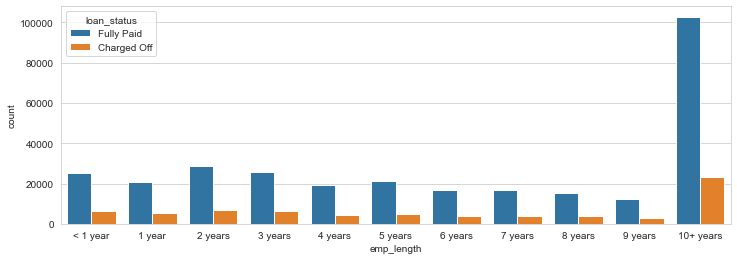

In [41]:
_ = plt.figure(figsize=(12,4))
_ = sns.countplot(x='emp_length', data=df, order=emplen_sorted, hue='loan_status')

This doesn't really inform us if there is a strong relationship between employment length and paying a loan in full vs being charged off.

**We will create a table to look at the percent of borrowers charged off per employee length**

In [42]:
# create series showing count of borrowers "charged off" per emp length
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

# create series counting all borrowers per emp length
emp_ = df.groupby("emp_length").count()['loan_status']

# create series showing the percent of borrowers charged off per emp length
ch_off = emp_co / emp_

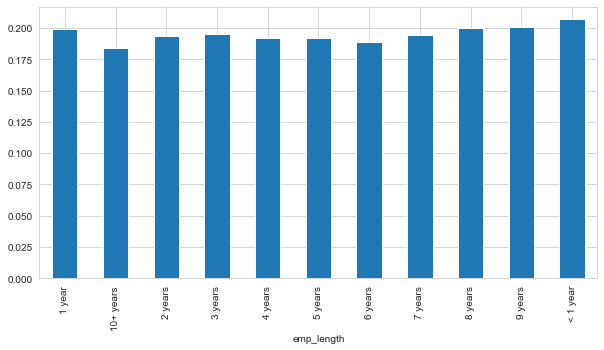

In [43]:
# create a barplot showing these results
f = plt.figure(figsize=(10, 5))
_ = ch_off.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. We will just drop the `emp_length` column.**

In [44]:
df.drop('emp_length', axis=1, inplace=True)

Let's look at the remaining missing values.

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We will now take a look at the `title` column vs the `purpose` column.

In [46]:
feat_info('title')

The loan title provided by the borrower


In [47]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


Take a look at the values in each of these features

In [48]:
df.title

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [49]:
df.purpose

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

**The title column looks to simply be a string subcategory/description of the purpose column. We will just drop the title column.**

In [50]:
df.drop('title', axis=1, inplace=True)

Let's review the missing values again.

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

It looks like the feature `mort_acc` has a lot of missing values. Let's check this column out.

In [52]:
feat_info('mort_acc')

Number of mortgage accounts.


In [53]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

Let's review the other columns to see which most highly correlates to `mort_acc`

In [54]:
print('Correlation with the mort_acc column:')
df.corr()['mort_acc'].sort_values()[:-1] # [:-1] removes the last index value, being mort_acc, itself which isn't important

Correlation with the mort_acc column:


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

**Looks like the `total_acc` feature correlates with the `mort_acc`. We will group the dataframe by the `total_acc` and calculate the mean value for the `mort_acc` per `total_acc` entry.**

Review the `total_acc` feature.

In [55]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


Group the dataframe by `total_acc` and find the mean of `mort_acc`

In [56]:
print('Mean of mort_acc column per total_acc')
df.groupby('total_acc')['mort_acc'].mean()

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

We are going to fill the missing values now using the .apply() method on the dataframe.

In [57]:
# create a table to pull mean values from
tot_acc_mean = df.groupby('total_acc')['mort_acc'].mean()

In [58]:
# create a function to be used in the .apply() method to fill the values if there is a missing value
def fill_mortacc(total_acc, mort_acc):
    if pd.isnull(mort_acc):
        return tot_acc_mean[total_acc]
    else:
        return mort_acc

In [59]:
# fill the missing values
df['mort_acc'] = df.apply(lambda x: fill_mortacc(x['total_acc'], x['mort_acc']), axis=1)

Review the remaining columns with missing values

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**Since the remaining columns only have a few values missing (less than 0.5%), we will just use .dropna()**

In [61]:
df.dropna(inplace=True)

---
## Categorical Features

Take a look at the categorical features.

In [62]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We will now go through all the string features to see what we should do with them.

Let's review the `term` feature

In [63]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

**We will turn these values into numerical values**

In [64]:
df['term'] = df['term'].apply(lambda x: float(x.split()[0]))

Review the value counts for this feature

In [65]:
df['term'].value_counts()

36.0    301247
60.0     93972
Name: term, dtype: int64

Review other categorical features

In [66]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### grade feature

**Since we already know `grade` is part of `sub_grade`, we will drop this feature.**

In [67]:
df.drop('grade', axis=1, inplace=True)

**Now we will convert the `sub_grade` category into dummy variables.**

In [68]:
# create dummy variables and merge the results into the existing dataframe
sub_grade_dums = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, sub_grade_dums],axis=1 )
df.drop('sub_grade', axis=1, inplace=True)

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36.0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36.0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60.0,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

*Look at the categorical features that have 15 or less values within them.*

In [76]:
for col in df.select_dtypes('object').columns:
    if df[col].nunique() <= 15:
        print(f'Feature: {col}\nValues: {df[col].unique()}\n')

Feature: home_ownership
Values: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE']
Feature: verification_status
Values: ['Not Verified' 'Source Verified' 'Verified']
Feature: loan_status
Values: ['Fully Paid' 'Charged Off']
Feature: purpose
Values: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Feature: initial_list_status
Values: ['w' 'f']
Feature: application_type
Values: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


We will inspect the `home_ownership` column:

In [77]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**We will convert this feature into dummy variables, but first we will combine 'NONE' and 'ANY' with 'OTHER'.**

In [78]:
df['home_ownership'].replace(to_replace=['NONE','ANY'], value='OTHER', inplace=True)
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [79]:
# create dummy variables and combine the tables
home_dums = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, home_dums], axis=1)
df.drop('home_ownership', axis=1, inplace=True)

Review the remaining categorical features:

In [81]:
for col in df.select_dtypes('object').columns:
    if df[col].nunique() <= 15:
        print(f'Feature: {col}\nValues: {df[col].unique()}\n')

Feature: verification_status
Values: ['Not Verified' 'Source Verified' 'Verified']

Feature: loan_status
Values: ['Fully Paid' 'Charged Off']

Feature: purpose
Values: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']

Feature: initial_list_status
Values: ['w' 'f']

Feature: application_type
Values: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']



**Since all of these columns values are specific enough to their category, we will just create dummy variables for `['verification_status', 'application_type','initial_list_status','purpose']`**

In [85]:
# create dummy variables and merge dataframes
cat_dums = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = pd.concat([df, cat_dums], axis=1)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df.select_dtypes('object').columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

We will review the `address` column

In [90]:
df.address

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

**It looks like we could feature engineer this many ways. Let's start by extracting the zip code.**

In [91]:
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])

In [93]:
df.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**It looks there are only a few zipcodes from all of the clients. We will create dummy variables from this data.**

In [94]:
zip_dums = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df, zip_dums], axis=1)
df.drop(['zip_code', 'address'], axis=1, inplace=True)

In [95]:
df.select_dtypes('object').columns

Index(['issue_d', 'earliest_cr_line'], dtype='object')

**The column `issue_d` would be considered data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue date as a feature, we will drop this.**

In [96]:
df.drop('issue_d', axis=1, inplace=True)

The remaining categorical feature is `earliest_cr_line`. Lets look at this a bit.

In [98]:
df.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

This appears to be a historical time stamp feature. We will extract the year from this feature using the .apply function, and then convert it to a numeric feature.

**We will make it into a new column called `earliest_cr_yr` and drop the mined column `earliest_cr_line`.**

In [99]:
df['earliest_cr_yr'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))

In [100]:
df['earliest_cr_yr'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_yr, dtype: int64

In [101]:
# drop the old column
df = df.drop('earliest_cr_line', axis=1)

---
---
# Creating the Model

### Train Test Split

In [102]:
# import necessary modules to split the data
from sklearn.model_selection import train_test_split

In [108]:
# split up features from target column
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

# perfrom a train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing the Data

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [111]:
# fit the training set, not the test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Import Tensorflow and Keras packages for creating the model

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Review the shape of the data

In [113]:
X_train.shape

(316175, 78)

### Build the model using the Sequential algorithm

Since there are 78 features for this model, we will create a sequential model that drops the number of neurons by roughly half, until our last layer only has 1.

In [114]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=1, activation='sigmoid'))

# adam optimizer is similar to rmsprop, but really: 'adam' = 'rmsprop' + 'momentum'
# momentum takes past gradient decsents into account to smooth out the gradient
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Fit the model to the training data

We will add in validation data for future analysis.

In [115]:
model.fit(x=X_train,
          y=y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test),
         )

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 5s 15us/sample - loss: 0.3034 - accuracy: 0.8785 - val_loss: 0.2655 - val_accuracy: 0.8869
Epoch 2/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2677 - accuracy: 0.8883 - val_loss: 0.2634 - val_accuracy: 0.8869
Epoch 3/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2643 - accuracy: 0.8884 - val_loss: 0.2628 - val_accuracy: 0.8869
Epoch 4/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2629 - accuracy: 0.8884 - val_loss: 0.2626 - val_accuracy: 0.8869
Epoch 5/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2622 - accuracy: 0.8882 - val_loss: 0.2619 - val_accuracy: 0.8869
Epoch 6/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2612 - accuracy: 0.8883 - val_loss: 0.2625 - val_accuracy: 0.8869
Epoch 7/50
316175/316175 [=================

**We are going to save the model for future reference.**

In [116]:
from tensorflow.keras.models import load_model

In [117]:
model.save('Model_predict_loan_acceptance.h5') #Creates an HDF5 file 

---

# Evaluating Model Performance.

**We will plot out the validation loss versus the training loss.**

Create a table showing the model performance metrics for each epoch.

In [118]:
model_hist = pd.DataFrame(model.history.history)

In [119]:
model_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.303359,0.878548,0.265534,0.886873
1,0.267685,0.888293,0.263444,0.886924
2,0.264280,0.888362,0.262803,0.886924
3,0.262883,0.888397,0.262615,0.886949
4,0.262156,0.888249,0.261947,0.886924


Seperate each metric out. `loss` in one table, `accuracy` in another.

In [120]:
model_loss = model_hist[['loss', 'val_loss']]
model_acc = model_hist[['accuracy', 'val_accuracy']]

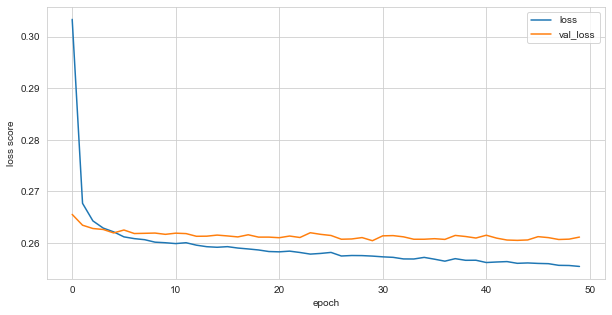

In [126]:
# Create a simple plot showing the results for the 'loss' metric
_ = model_loss.plot(figsize=(10, 5))
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss score')

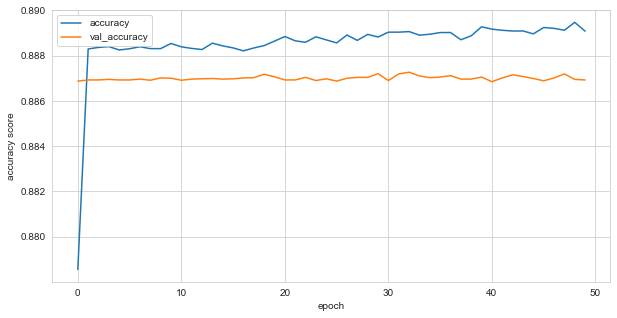

In [127]:
# Create a simple plot showing the results for the 'loss' metric
_ = model_acc.plot(figsize=(10, 5))
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy score')

**The model performance looks good. We will proceed to test the model predictions.**

---

### Testing the model

In [128]:
# assign model predictions
predictions = model.predict_classes(X_test)

In [129]:
# import necessary packages for evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
# print the model metrics
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6760  8898]
 [   40 63346]]


# End of Notebook.